# Spam Detector

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [2]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

**Prediction:  Since I don't know a lot about the data and don't have an opportunity to ask any clarifying quesitons, I predict Random Forest will perform better that Logistic Regression.  In general, Random Forest seems more robust than Logistic Regression in modeling connections between the predictor values and the result.  Random Forest uses predictions of numerous decision trees to make a final prediction, it handles linear and non-linear relationships between the variables, and handles high-dimensional data with less risk of overfitting.**  

## Split the Data into Training and Testing Sets

In [3]:
# Create the labels set `y` and features DataFrame `X`

# Create the labels set `y`
y = data['spam']
display(y[0:5])

# Create features DataFrame `X`
X = data.copy()
X = X.drop(columns="spam")
display(X.head())

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [4]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [5]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [6]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)


StandardScaler()

In [8]:
# Scale the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [9]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

# Create a `LogisticRegression` function
lr_model = LogisticRegression(random_state=1)

# Fit the model
lr_model.fit(X_train_scaled, y_train)

# Print the model score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9257971014492754
Testing Data Score: 0.9226759339704604


In [10]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = lr_model.predict(X_test_scaled)

# Review the predictions
testing_predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [11]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
lr_acc_score = accuracy_score(y_test, testing_predictions)

# Display results
print(f"Logistic Regression Accuracy Score : {lr_acc_score}")

Logistic Regression Accuracy Score : 0.9226759339704604


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [12]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Print the model score
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")


Training Data Score: 0.9994202898550725
Testing Data Score: 0.9609035621198957


In [13]:
# Make and save testing predictions with the saved logistic regression model using the test data

# Make predictions using the testing data
rf_testing_predictions = rf_model.predict(X_test_scaled)

# Review the predictions
rf_testing_predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [14]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
rf_acc_score = accuracy_score(y_test, rf_testing_predictions)

# Display Random Forest Accuracy
print(f"Random Forest Accuracy Score : {rf_acc_score}")

Random Forest Accuracy Score : 0.9609035621198957


In [15]:
# Display Logistic Regression Accuracy
print(f"Logistic Regression Accuracy Score : {lr_acc_score}")

Logistic Regression Accuracy Score : 0.9226759339704604


## Additional Analysis

Take a look at the features importance of both models.

In [17]:
# Import numpy and pyplot to use for analysis
import matplotlib.pyplot as plt
import numpy as np

<Axes: ylabel='Feature'>

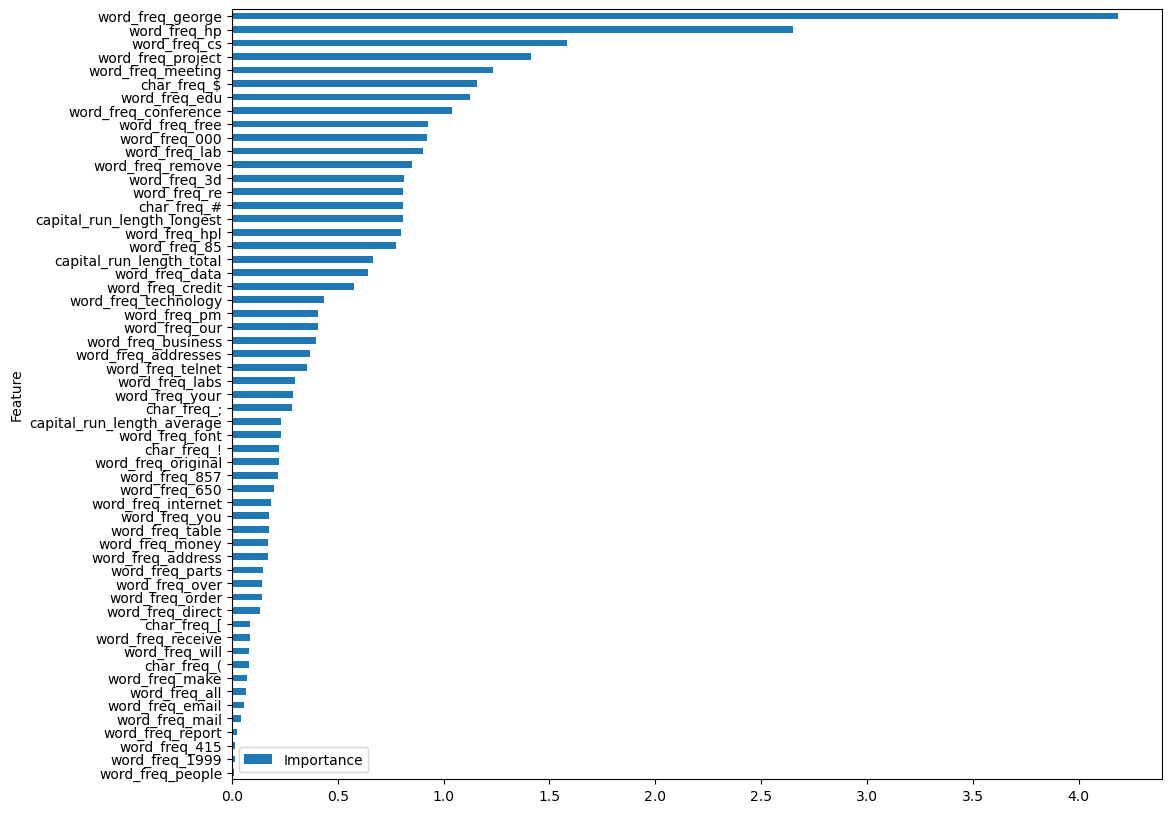

In [38]:
# Calculate and Graph Logistic Regression Feature Importance
lr_coefficients = lr_model.coef_

lr_avg_importance = np.mean(np.abs(lr_coefficients), axis=0)
lr_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': lr_avg_importance})
lr_feature_importance = lr_feature_importance.sort_values('Importance', ascending=True)
lr_feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(12, 10))

In [32]:
# Display Logistic Regression important features
lr_feature_importance_sort_desc = lr_feature_importance.sort_values('Importance', ascending=False)
lr_feature_importance_sort_desc.head(10)

,Feature,Importance
26,word_freq_george,4.184433
24,word_freq_hp,2.652692
40,word_freq_cs,1.581230
43,word_freq_project,1.414723
41,word_freq_meeting,1.232588
52,char_freq_$,1.157222
45,word_freq_edu,1.127105
47,word_freq_conference,1.038352
15,word_freq_free,0.926819
22,word_freq_000,0.923066


In [23]:
# Get Random Forest Feature Importance

# Get the feature importance array
rf_feature_importances = rf_model.feature_importances_

# Sort and Display Random Forest important features
rf_importances_sorted = sorted(zip(rf_feature_importances, X.columns), reverse=True)
rf_importances_sorted[:10]

[(0.11977573483692322, 'char_freq_$'),
 (0.10267180801043749, 'char_freq_!'),
 (0.08035895173882529, 'word_freq_remove'),
 (0.06782672326466811, 'capital_run_length_average'),
 (0.06544576502052919, 'word_freq_free'),
 (0.05962601347466497, 'capital_run_length_longest'),
 (0.04780671387872698, 'word_freq_your'),
 (0.04466598597929292, 'word_freq_hp'),
 (0.037341388550380515, 'capital_run_length_total'),
 (0.03201250102219554, 'word_freq_you')]

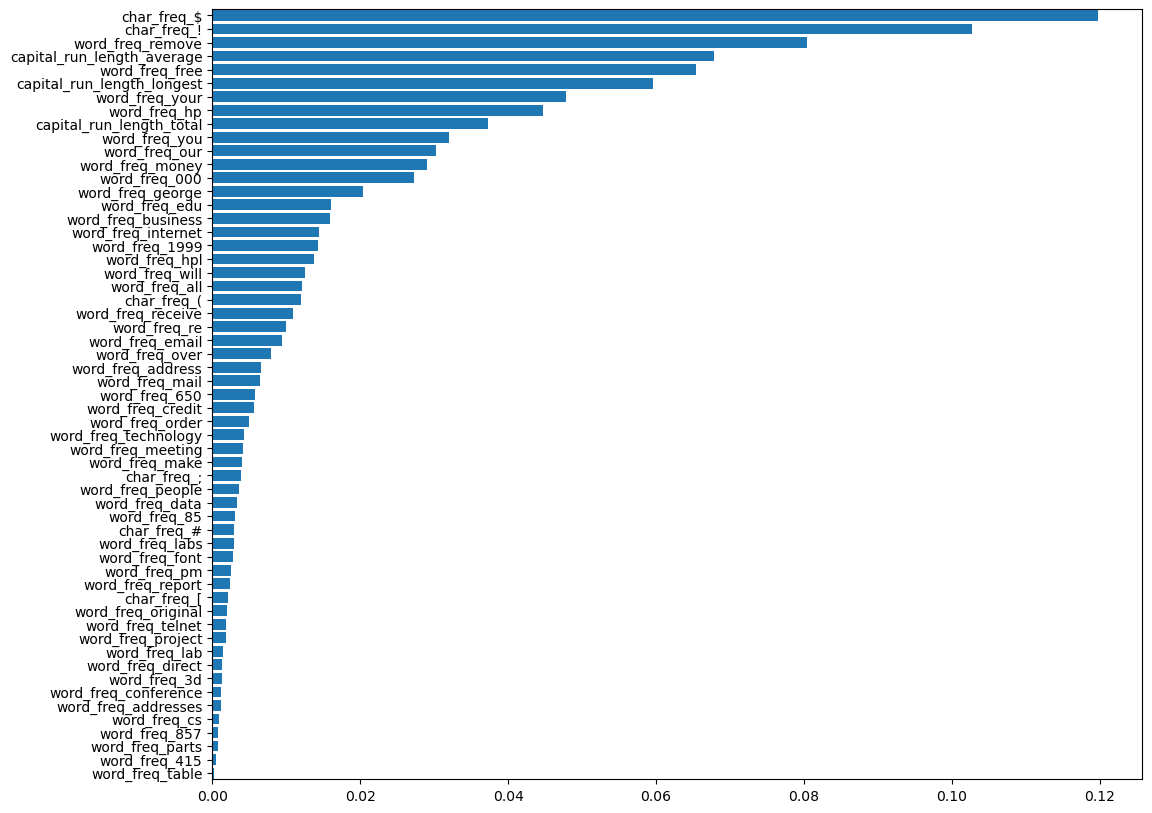

In [36]:
# Graph the Random Forest feature importances
features = sorted(zip(X.columns, rf_feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(12,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

***Question 1:  Which model performed better?***
**Answer:  The Random Forest model performed better on this data than Logistic Regression.  The Random Forest Accuracy Score is 0.961 and Logistic Regression Accuracy Score is 0.923.**
 
***Question 2:  How does that compare to your prediction?***
**Answer:  I predicted Random Forest and the results match my prediction.**